### Build a logistic regression model for another binary classification dataset (e.g., breast cancer diagnosis).

Cross-Validation Accuracy: 0.9780 ± 0.0139
Test Accuracy: 0.9561
Precision: 0.9855
Recall: 0.9444
F1 Score: 0.9645


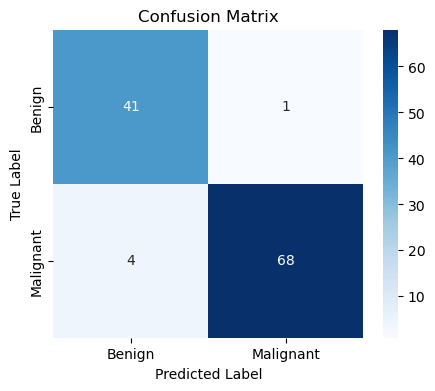

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset from sklearn
data = load_breast_cancer()

# Convert the dataset into a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Split the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model with improvements
model = LogisticRegression(solver='liblinear', C=1.0, class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

# Cross-validation for more reliable performance evaluation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the evaluation metrics
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Display the confusion matrix using a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Use cross-validation to improve the performance of the model and compare it with the baseline.

Baseline Model Metrics:
Accuracy: 0.9561
Precision: 0.9855
Recall: 0.9444
F1 Score: 0.9645

Cross-Validation Metrics:
Accuracy: 0.9561
Precision: 0.9855
Recall: 0.9444
F1 Score: 0.9645

Cross-Validation Mean Accuracy (10-Folds): 0.9780 ± 0.0198


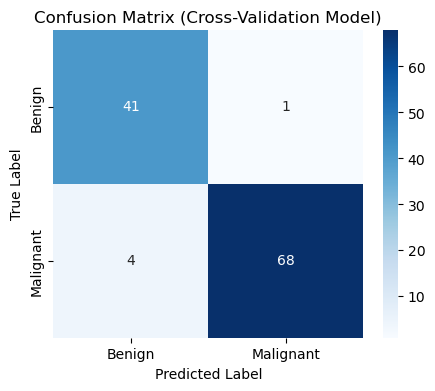

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data = load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Split data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split into training and testing sets (stratified for balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Baseline Logistic Regression Model (No Cross-Validation)
baseline_model = LogisticRegression(solver='liblinear', C=1.0, class_weight='balanced', random_state=42)
baseline_model.fit(X_train_scaled, y_train)

# Predictions & Evaluation
y_pred_baseline = baseline_model.predict(X_test_scaled)
baseline_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_baseline),
    "Precision": precision_score(y_test, y_pred_baseline),
    "Recall": recall_score(y_test, y_pred_baseline),
    "F1 Score": f1_score(y_test, y_pred_baseline),
}

# Cross-Validation Model (10-Folds Stratified)
cv_model = LogisticRegression(solver='liblinear', C=1.0, class_weight='balanced', random_state=42)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(cv_model, X_train_scaled, y_train, cv=cv, scoring='accuracy')

# Train the model using Cross-Validation
cv_model.fit(X_train_scaled, y_train)

# Predictions & Evaluation
y_pred_cv = cv_model.predict(X_test_scaled)
cv_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_cv),
    "Precision": precision_score(y_test, y_pred_cv),
    "Recall": recall_score(y_test, y_pred_cv),
    "F1 Score": f1_score(y_test, y_pred_cv),
}

# Print Metrics
print(f"Baseline Model Metrics:")
for metric, value in baseline_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nCross-Validation Metrics:")
for metric, value in cv_metrics.items():
    print(f"{metric}: {value:.4f}")

# Cross-Validation Summary
print(f"\nCross-Validation Mean Accuracy (10-Folds): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred_cv)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Cross-Validation Model)")
plt.show()

### Try a different classification algorithm like K-Nearest Neighbors (KNN) and compare the performance with logistic regression.

Logistic Regression Metrics:
Accuracy: 0.9561
Precision: 0.9855
Recall: 0.9444
F1 Score: 0.9645

K-Nearest Neighbors (KNN) Metrics (Best k = 7):
Accuracy: 0.9737
Precision: 0.9600
Recall: 1.0000
F1 Score: 0.9796


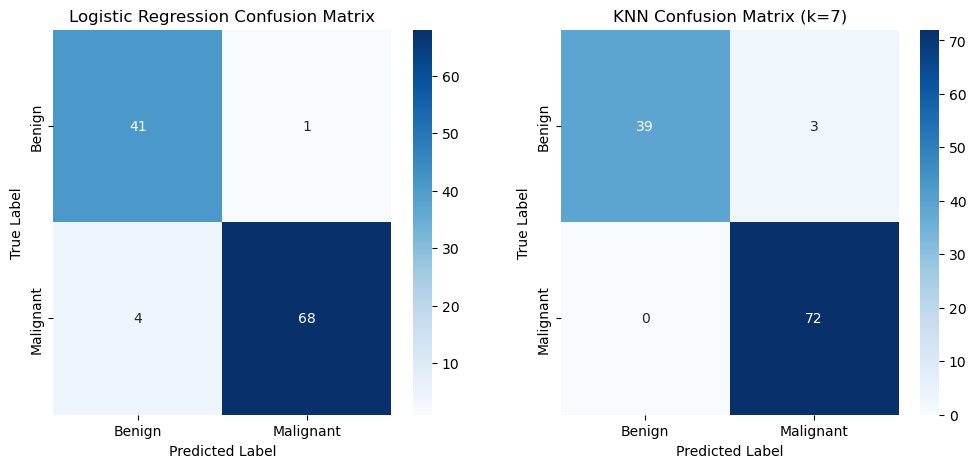

In [8]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import load_breast_cancer

# Fix CPU core detection warning for joblib
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

# Load the Breast Cancer dataset
data = load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Split data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split into training and testing sets (stratified for balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize features (important for both Logistic Regression and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model with Hyperparameter Tuning
logreg_model = LogisticRegression(solver='liblinear', C=1.0, class_weight='balanced', random_state=42)
logreg_model.fit(X_train_scaled, y_train)

# Finding the Best k for KNN
best_k = None
best_knn_score = 0
for k in range(1, 21):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    score = np.mean(cross_val_score(knn_temp, X_train_scaled, y_train, cv=10, scoring='accuracy', n_jobs=1))  # Use 1 CPU
    if score > best_knn_score:
        best_knn_score = score
        best_k = k

# Train KNN with the Best k
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_logreg = logreg_model.predict(X_test_scaled)
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate Logistic Regression
logreg_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_logreg),
    "Precision": precision_score(y_test, y_pred_logreg),
    "Recall": recall_score(y_test, y_pred_logreg),
    "F1 Score": f1_score(y_test, y_pred_logreg),
}

# Evaluate KNN
knn_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_knn),
    "Precision": precision_score(y_test, y_pred_knn),
    "Recall": recall_score(y_test, y_pred_knn),
    "F1 Score": f1_score(y_test, y_pred_knn),
}

# Print Metrics
print(f"Logistic Regression Metrics:")
for metric, value in logreg_metrics.items():
    print(f"{metric}: {value:.4f}")

print(f"\nK-Nearest Neighbors (KNN) Metrics (Best k = {best_k}):")
for metric, value in knn_metrics.items():
    print(f"{metric}: {value:.4f}")

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression Confusion Matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"], ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# KNN Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"], ax=axes[1])
axes[1].set_title(f"KNN Confusion Matrix (k={best_k})")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.show()